### 📌 Project Overview: Churn Prediction

This notebook supports **Phase 3** of the churn prediction pipeline. It performs exploratory data analysis (EDA), builds baseline machine learning models, and evaluates their performance. The end goal is to identify customers at high risk of churn, enabling the business to take proactive retention actions.

**Objectives:**
- Understand the distribution of churn and key features  
- Handle class imbalance if necessary  
- Train baseline models (Logistic Regression, Random Forest)  
- Evaluate model performance using Recall and ROC AUC  
- Save the final model for deployment


## **Importing Data and Initial Observations**

In [10]:

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load the dataset
df = pd.read_csv("../data/processed/transformed_telco.csv")

print("✅ Data shape:", df.shape)

# Preview of the dataset
df.head()

✅ Data shape: (7032, 25)


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group,monthly_charge_ratio,has_tech_support,paperless_billing,has_streaming_services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,0-12,14.925000,0.0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,24-48,1.627143,0.0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,0-12,17.950000,0.0,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,24-48,0.919565,1.0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,0-12,23.566667,0.0,1,0


### Analyzing Churn Distribution

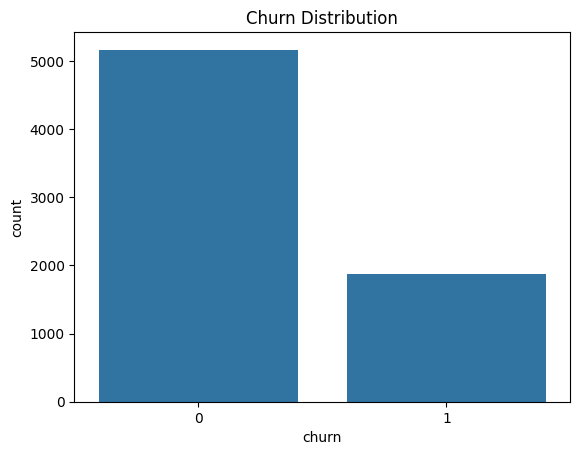

Churn Rate: 26.58%


In [8]:
# Churn value counts
sns.countplot(data=df, x='churn')
plt.title("Churn Distribution")
plt.show()

# Churn rate
churn_rate = df['churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")


Considering the imbalance in the churn rate, it is important to carefully monitor class distribution throughout the EDA and modeling process to ensure the data is handled appropriately.



## **Encoding, Scaling, and Train/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df_model = df.copy()

# Define features and target
X = df_model.drop(columns=['churn'])
y = df_model['churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numerical_cols)


Categorical columns: ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'tenure_group']
Numeric columns: ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'monthly_charge_ratio', 'has_tech_support', 'paperless_billing', 'has_streaming_services']


In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [ ]:
# Scale numerical variables
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
